***
# Building prediction model
***

1. **Train data on sales of 2017-2018**
2. **Predict sales 2019-2021 and compare with real values**
3. **Add the subsides and compare the sales**
4. **Evaluate the impact of RV**
<br>

***

In [1]:
# Create folders and getting path
import os
cwd = os.getcwd()

# Loop to create folders
folder_names = ['Dataframe', 'Output', 'Data']

folders = {}
for folder_name in folder_names:
    folders[folder_name] = os.path.join(cwd, folder_name)

    if not os.path.exists(os.path.join(cwd, folder_name)):
        os.makedirs(os.path.join(cwd, folder_name))
        print(f'Le dossier « {folder_name} » a été créé')

    else:
        print(f'Le dossier « {folder_name} » est existant')


# Création des variables de path

# Déterminer si os est win ou linux pour définir les path
if os.name == 'nt':
    slash = '\\'
elif os.name == 'posix':
    slash = '/'

path_prog =     cwd + slash
path_data =     folders['Data'] + slash
path_df =       folders['Dataframe'] + slash
path_output =   folders['Output'] + slash

# Mettre \\ pour éviter les erreurs
path_dict = [path_prog, path_data, path_df, path_output]
for path in path_dict:
    path = path.replace('\\','\\\\')


# Détermination de l'année
print()
print(path_prog)
print(path_data)
print(path_df)
print(path_output)

Le dossier « Dataframe » est existant
Le dossier « Output » est existant
Le dossier « Data » est existant

c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Data\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Dataframe\
c:\Users\Charles_tour\Documents\GitHub\car_sales_forcast\Output\


***
<b>Ce qu'on veut prédire</b> : TYP_CARBU (VÉ)

<b>Variables explicatives</b> : MASSE_NETTE, COUL_ORIG, TYP_DOSS_PERS, PHYS_SEX, PHYS_AGE, REG_ADM, MRC

***
Étapes :
1. feature enginering (encode)
2. train on 2017 and 2018
3. forcast 2019 to 2021
3. compare with real results

In [3]:
import pandas as pd
df_unique = pd.read_hdf(path_df + 'df_unique.h5')
df_unique.head(2)

,AN,NOSEQ_VEH,CLAS,TYP_VEH_CATEG_USA,MARQ_VEH,MODEL_VEH,ANNEE_MOD,MASSE_NETTE,NB_CYL,CYL_VEH,...,MRC,CG_FIXE,link_model_an,year,model,brand,prix_min,prix_max,cons_min,cons_max
0,2017,2017_0000000016,PAU,AU,FORD,ESCAP,2017,1662.0,4.0,2001.0,...,Drummond (49 ),49030.0,https://www.guideautoweb.com/constructeurs/for...,2017,escape,ford,25099.0,35999.0,7.8,11.5
1,2017,2017_0000000022,PAU,AU,CHEVR,VOLT,2017,1578.0,4.0,1509.0,...,Saguenay (941),94068.0,https://www.guideautoweb.com/constructeurs/che...,2017,volt,chevrolet,38790.0,42890.0,5.5,5.6


In [17]:
# 'TYP_DOSS_PERS'

cols = ['AN', 'TYP_CARBU', 'MASSE_NETTE', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE' ,'REG_ADM', 'MRC']
df = df_unique[cols]
df.head(3)

,AN,TYP_CARBU,MASSE_NETTE,COUL_ORIG,PHYS_SEX,PHYS_AGE,REG_ADM,MRC
0,2017,E,1662.0,ROU,F,76.0,Centre-du-Québec (17),Drummond (49 )
1,2017,W,1578.0,NOI,M,33.0,Saguenay–Lac-Saint-Jean (02),Saguenay (941)
2,2017,E,1113.0,GRI,F,87.0,Laurentides (15),Les Laurentides (78 )


In [22]:
df.isna().sum()

AN                  0
TYP_CARBU           0
MASSE_NETTE        51
COUL_ORIG       42630
PHYS_SEX       492920
PHYS_AGE       492920
REG_ADM         22168
MRC             22168
dtype: int64

In [57]:
df_test = df.dropna()

print(df_test.isna().sum())

print(len(df))
print(len(df_test))

AN             0
TYP_CARBU      0
MASSE_NETTE    0
COUL_ORIG      0
PHYS_SEX       0
PHYS_AGE       0
REG_ADM        0
MRC            0
dtype: int64
2242375
1724174


In [67]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

y = df_test['TYP_CARBU']

# features = ['MASSE_NETTE', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE' ,'REG_ADM', 'MRC']
X = df_test[['AN' ,'MASSE_NETTE', 'COUL_ORIG', 'PHYS_SEX', 'PHYS_AGE' ,'REG_ADM', 'MRC']]

X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report for more details
print(classification_report(y_test, y_pred))

Accuracy: 0.95


C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00         1
           D       0.69      0.70      0.70      3051
           E       0.98      0.98      0.98    313605
           H       0.66      0.66      0.66      7626
           L       0.76      0.77      0.77     11675
           M       0.00      0.00      0.00         0
           N       0.00      0.00      0.00         4
           P       0.09      0.06      0.07        18
           S       0.00      0.00      0.00         0
           W       0.76      0.75      0.75      8855

    accuracy                           0.95    344835
   macro avg       0.39      0.39      0.39    344835
weighted avg       0.95      0.95      0.95    344835



C:\Users\Charles_tour\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Results
1. Accuracy: 0.94: The overall accuracy of your model is 94%, indicating that it correctly predicts the class labels for approximately 94% of the total instances.
2. Precision : the ratio of true positive predictions to the total positive predictions made by the model. Precision = True Positives / (True Positives + False Positives)
3. Recall (Sensitivity or True Positive Rate) : Recall is the ratio of true positive predictions to the total actual positives in the dataset.
4. F1-Score: F1-Score is the harmonic mean of precision and recall. It balances the trade-off between precision and recall, providing a single metric that combines both aspects.
F1-Score is calculated as: F1-Score = 2 * (Precision * Recall) / (Precision + Recall).

<u>**Type de carburant**</u> <br>
A = Autre <br>
C = Hydrogène <br>
D = Diésel <br>
E = Essence <br>
H = Hybride <br>
L = Électricité <br>
M = Méthanol <br>
N = Gaz naturel <br>
P = Propane <br>
S = Non-propulsé <br>
T = Éthanol <br>
W = Hybride branchable <br>
blanc = Non précisé <br>

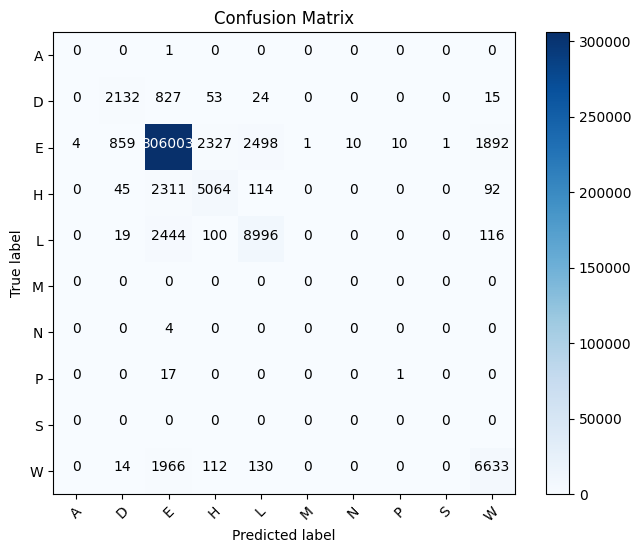

In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# Create a confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Define class labels
class_labels = model.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


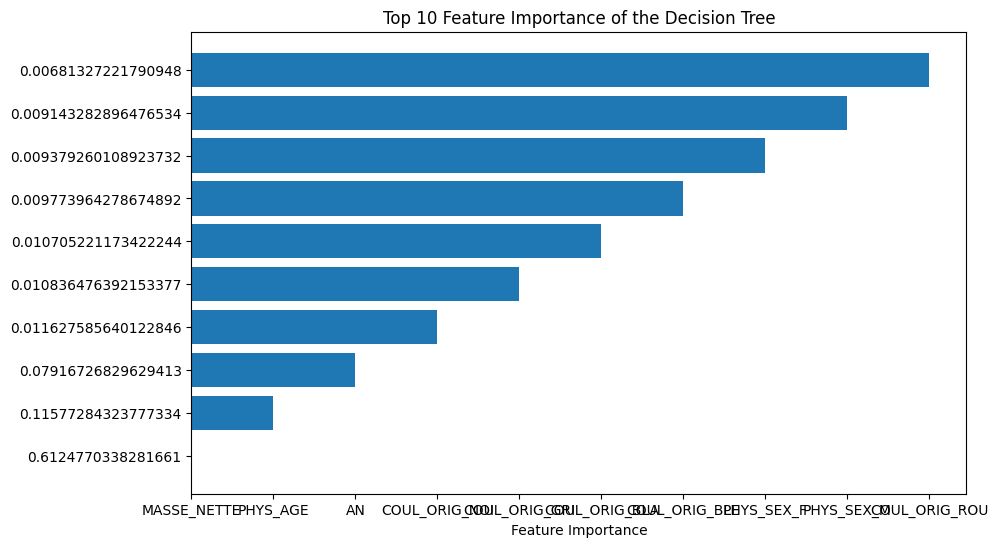

In [77]:
# Number of top features to display
top_n = 10  # Change this value to the number of top features you want to display

# Sort feature importances and select the top N
sorted_feature_importance = sorted(zip(feature_importance, feature_names), reverse=True)
top_feature_importance = sorted_feature_importance[:top_n]
top_feature_names, top_feature_importance = zip(*top_feature_importance)

# Create a bar chart to visualize the top features
fig, ax = plt.subplots(figsize=(10, 6))
plt.barh(range(len(top_feature_importance)), top_feature_importance)
plt.yticks(range(len(top_feature_importance)), top_feature_names)
plt.xlabel('Feature Importance')
plt.title(f'Top {top_n} Feature Importance of the Decision Tree')
plt.show()
